## **Index:**
- Please ensure R is installed on your machine and packages for Robyn have been installed
- [Import necessary python packages](#import-python-packages)
- Environment Setup:
    - [Setting up environment on WINDOWS machine](#Setting-up-environment-on-WINDOWS-machine)
    - [Setting up environment on LINUX machine](#Setting-up-environment-on-LINUX-machine)
    - [Setting up environment on MAC](#Setting-up-environment-on-MAC)
- Demo Script
    - Provision API
    - Get Data
    - Robyn Inputs
    - Robyn Run
    - Robyn Outputs

#### Import necessary python packages <a class="anchor" id="import-python-packages"></a>

In [3]:
import pandas as pd
import json
import requests
import json
import datetime as dt
import binascii
import io
import pandas as pd
import os
import sys
import subprocess
from urllib.request import urlopen
from bs4 import BeautifulSoup

import pprint
from PIL import Image
Image.MAX_IMAGE_PIXELS = 2**30

#### Setting up environment on WINDOWS machine <a class="anchor" id="Setting-up-environment-on-WINDOWS-machine"></a>

#### Barebones command to run RobynAPI -> <font color='red'> ! START "" /B "<path_where_R_is_installed>\Rscript.exe" "<path_where_robyn_api_files_exist>\api_call.R" </font>
1. Find location where R is installed on your machine. If the location is "C:\Program Files\R\R-4.2.2\bin\" Then use this to replace <path_where_R_is_installed>
2. Find where api files exist and replace it with <path_where_robyn_api_files_exist>
    e.g. ! START "" /B "C:\Program Files\R\R-4.2.2\bin\Rscript.exe" "C:\Documents\GitHub\robyn\robyn_api\api_call.R"

In [2]:
! START "" /B "C:\Program Files\R\R-4.2.2\bin\Rscript.exe" "C:/Users/ebyjose/OneDrive - Facebook/Documents/GitHub/robyn/robyn_api/api_call.R"

zsh:1: command not found: START


#### Steps to run RobynAPI if you are using a <u> LINUX </u> machine/server <a class="anchor" id="Setting-up-environment-on-LINUX-machine"></a>

#### Barebones command to run RobynAPI -> <font color='red'> ! Rscript <path_where_robyn_api_files_exist>\api_call.R &</font>
1. Find location where R is installed on your machine. If the location is "C:\Program Files\R\R-4.2.2\bin\" Then use this to replace <path_where_R_is_installed>
2. Find where api files exist and replace it with <path_where_robyn_api_files_exist>
    
    e.g. # ! Rscript /home/robyn/robyn_api/api-call.R

In [ ]:
! Rscript <path_to_apifile>/api_call.R &

#### Steps to run RobynAPI if you are using a <u> MAC </u> <a class="anchor" id="Setting-up-environment-on-MAC"></a>

#### Barebones command to run RobynAPI -> <font color='red'> subprocess.Popen(["Rscript", "<path_to_apifile>/api_call.R"])</font>
1. Find where api files exist and replace it with <path_to_apifile>
    
    e.g. # subprocess.Popen(["Rscript", "/home/robyn/robyn_api/api_call.R"])

In [108]:
p = subprocess.Popen(["Rscript", "./api_call.R"])

Running plumber API at http://127.0.0.1:9999
Running swagger Docs at http://127.0.0.1:9999/__docs__/


In [114]:
p.kill()
p = subprocess.Popen(["Rscript", "./api_call.R"])

Running plumber API at http://127.0.0.1:9999
Running swagger Docs at http://127.0.0.1:9999/__docs__/


## Demo file

In [7]:
apiBaseUrl = "http://127.0.0.1:9999/{}"
url = apiBaseUrl[:-3]+"/openapi.json"
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")
apis = json.loads(soup.contents[0])
apis['paths'].keys()

dict_keys(['/dt_simulated_weekly', '/dt_prophet_holidays', '/robyn_inputs', '/robyn_run', '/robyn_outputs', '/robyn_onepagers', '/robyn_allocator'])

# Define Functions

In [8]:
hexToPng = lambda fileName, hexData: Image.open(io.BytesIO(binascii.unhexlify(hexData))).save(fileName, "png")
dateConv = lambda date: dt.datetime.strptime(date, '%Y-%m-%d').date()

In [9]:
def asSerialisedFeather(modelData):
    modelDataFeather = io.BytesIO()
    pd.DataFrame(modelData).to_feather(modelDataFeather)
    modelDataFeather.seek(0)
    modelDataBinary = modelDataFeather.read()
    return binascii.hexlify(modelDataBinary).decode()

# Get Data

In [10]:
# Get the sample dataset from Robyn api for use in later steps
response = requests.post(apiBaseUrl.format('dt_simulated_weekly'))
respJson = json.loads(response.content.decode('utf-8'))
dtSimulatedWeekly = [{'DATE' : dateConv(rec['DATE']),**{col:rec[col]for col in rec if col!='DATE'}} for rec in respJson]
dtSimulatedWeeklyDf = pd.DataFrame(dtSimulatedWeekly)

In [11]:
dtSimulatedWeeklyDf.head()

,DATE,revenue,tv_S,ooh_S,print_S,facebook_I,search_clicks_P,search_S,competitor_sales_B,facebook_S,events,newsletter
0,2015-11-23,2.754372e+06,67075.04,0.0,38185.4667,7.290385e+07,0.0000,0,8125009,22821.3987,na,19401.6538
1,2015-11-30,2.584277e+06,85840.36,0.0,0.0000,1.658110e+07,29511.7155,12400,7901549,3425.8574,na,14791.0000
2,2015-12-07,2.547387e+06,0.00,396835.2,1361.6000,4.995477e+07,36132.3590,11360,8300197,12769.1261,na,14544.0000
3,2015-12-14,2.875220e+06,250350.92,0.0,53040.0000,3.164930e+07,36804.2110,12760,8122883,8401.4720,na,2800.0000
4,2015-12-21,2.215953e+06,0.00,832008.0,0.0000,8.802269e+06,28401.7441,10840,7105985,2068.7478,na,15478.0000


In [12]:
# Get the sample dataset from Robyn api for use in later steps
response = requests.post(apiBaseUrl.format('dt_prophet_holidays'))
respJson = json.loads(response.content.decode('utf-8'))
dt_prophet_holidays = pd.DataFrame(respJson)
dt_prophet_holidays.head()

,ds,holiday,country,year
0,1995-01-01,New Year's Day,AD,1995
1,1995-01-06,Epiphany,AD,1995
2,1995-02-28,Carnival,AD,1995
3,1995-03-14,Constitution Day,AD,1995
4,1995-04-14,Good Friday,AD,1995


# Robyn Input

## Step 2a: For first time user: Model specification in 4 steps
### 2a-1: First, specify input variables
    All sign control are now automatically provided: "positive" for media & organic
    variables and "default" for all others. User can still customise signs if necessary.
    Documentation is available, access it anytime by running: ?robyn_inputs

In [13]:
inputArgs = {
    "date_var": "DATE",
    "dep_var": "revenue",
    "dep_var_type": "revenue",
    "prophet_vars": ["trend", "season", "holiday"],
    "prophet_country": "DE",
    "context_vars" : ["competitor_sales_B", "events"],
    "paid_media_spends": ["tv_S", "ooh_S", "print_S", "facebook_S", "search_S"],
    "paid_media_vars": ["tv_S", "ooh_S", "print_S", "facebook_I", "search_clicks_P"],
    "organic_vars" : "newsletter",
    "window_start": "2016-01-01",
    "window_end": "2018-12-31",
    "adstock": "geometric"
}

In [14]:
# Build the payload for the robyn_inputs()
payload = {
    'modelData' : asSerialisedFeather(dtSimulatedWeeklyDf), 
    'holidayData' : asSerialisedFeather(dt_prophet_holidays), 
    'jsonInputArgs' : json.dumps(inputArgs)
}

In [15]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_inputs'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
InputCollect = respJson

Automatically set these variables as 'factor_vars': 'events'
Input 'window_start' is adapted to the closest date contained in input data: 2016-01-04


In [16]:
InputCollect.keys()

dict_keys(['dt_input', 'dt_holidays', 'dt_mod', 'dt_modRollWind', 'xDecompAggPrev', 'date_var', 'dayInterval', 'intervalType', 'dep_var', 'dep_var_type', 'prophet_vars', 'prophet_signs', 'prophet_country', 'context_vars', 'context_signs', 'paid_media_vars', 'paid_media_signs', 'paid_media_spends', 'paid_media_total', 'mediaVarCount', 'exposure_vars', 'organic_vars', 'organic_signs', 'all_media', 'all_ind_vars', 'factor_vars', 'unused_vars', 'window_start', 'rollingWindowStartWhich', 'window_end', 'rollingWindowEndWhich', 'rollingWindowLength', 'totalObservations', 'refreshAddedStart', 'adstock', 'hyperparameters', 'calibration_input', 'custom_params', 'version'])

## 2a-2: Second, define and add hyperparameters
    Default media variable for modelling has changed from paid_media_vars to paid_media_spends.
    Also, calibration_input are required to be spend names.
    hyperparameter names are based on paid_media_spends names too. See right hyperparameter names:

In [17]:
# hyper_names(adstock = InputCollect$adstock, all_media = InputCollect$all_media)

In [18]:
# Example hyperparameters ranges for Geometric adstock
inputArgs = {
    "hyperparameters" : {
        "facebook_S_alphas" : [0.5, 3],
        "facebook_S_gammas" : [0.3, 1],
        "facebook_S_thetas" : [0, 0.3],
        "print_S_alphas" : [0.5, 3],
        "print_S_gammas" : [0.3, 1],
        "print_S_thetas" : [0.1, 0.4],
        "tv_S_alphas" : [0.5, 3],
        "tv_S_gammas" : [0.3, 1],
        "tv_S_thetas" : [0.3, 0.8],
        "search_S_alphas" : [0.5, 3],
        "search_S_gammas" : [0.3, 1],
        "search_S_thetas" : [0, 0.3],
        "ooh_S_alphas" : [0.5, 3],
        "ooh_S_gammas" : [0.3, 1],
        "ooh_S_thetas" : [0.1, 0.4],
        "newsletter_alphas" : [0.5, 3],
        "newsletter_gammas" : [0.3, 1],
        "newsletter_thetas" : [0.1, 0.4],
        "train_size": [0.5, 0.8]
    }
}

## 2a-3: Third, add hyperparameters into robyn_inputs()

In [19]:
payload = {
    'InputCollect' : json.dumps(InputCollect), 
    'jsonInputArgs' : json.dumps(inputArgs)
}

In [20]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_inputs'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
InputCollect = respJson

>> Running feature engineering...


In [21]:
InputCollect.keys()

dict_keys(['dt_input', 'dt_holidays', 'date_var', 'dayInterval', 'intervalType', 'dep_var', 'dep_var_type', 'prophet_vars', 'prophet_signs', 'prophet_country', 'context_vars', 'context_signs', 'paid_media_vars', 'paid_media_signs', 'paid_media_spends', 'paid_media_total', 'mediaVarCount', 'exposure_vars', 'organic_vars', 'organic_signs', 'all_media', 'all_ind_vars', 'factor_vars', 'window_start', 'rollingWindowStartWhich', 'window_end', 'rollingWindowEndWhich', 'rollingWindowLength', 'totalObservations', 'refreshAddedStart', 'adstock', 'version', 'hyperparameters', 'dt_mod', 'dt_modRollWind', 'dt_inputRollWind', 'modNLS'])

## 2a-4: Fourth (optional), model calibration / add experimental input

In [22]:
# calibration_input <- data.frame(
#   # channel name must in paid_media_vars
#   channel = c("facebook_S",  "tv_S", "facebook_S+search_S", "newsletter"),
#   # liftStartDate must be within input data range
#   liftStartDate = as.Date(c("2018-05-01", "2018-04-03", "2018-07-01", "2017-12-01")),
#   # liftEndDate must be within input data range
#   liftEndDate = as.Date(c("2018-06-10", "2018-06-03", "2018-07-20", "2017-12-31")),
#   # Provided value must be tested on same campaign level in model and same metric as dep_var_type
#   liftAbs = c(400000, 300000, 700000, 200),
#   # Spend within experiment: should match within a 10% error your spend on date range for each channel from dt_input
#   spend = c(421000, 7100, 350000, 0),
#   # Confidence: if frequentist experiment, you may use 1 - pvalue
#   confidence = c(0.85, 0.8, 0.99, 0.95),
#   # KPI measured: must match your dep_var
#   metric = c("revenue", "revenue", "revenue", "revenue"),
#   # Either "immediate" or "total". For experimental inputs like Facebook Lift, "immediate" is recommended.
#   calibration_scope = c("immediate", "immediate", "immediate", "immediate")
# )
# calibration_input %>% as_tibble()
# InputCollect <- robyn_inputs(InputCollect = InputCollect, calibration_input = calibration_input)


In [33]:
calibration_input = {
    "channel": ["facebook_S","tv_S","facebook_S+search_S","newsletter"],
    "liftStartDate" : ["2018-05-01","2018-04-03","2018-07-01","2017-12-01"],
    "liftEndDate" : ["2018-06-10","2018-06-03","2018-07-20","2017-12-31"],
    "liftAbs" : [400000, 300000, 700000, 200],
    "spend" : [421000, 7100, 350000, 0],
    "confidence" : [0.85, 0.8, 0.99, 0.95],
    "metric" : ["revenue","revenue","revenue","revenue"],
    "calibration_scope" : ["immediate","immediate","immediate","immediate"]
}
calibration_input = pd.DataFrame(calibration_input)
calibration_input

,channel,liftStartDate,liftEndDate,liftAbs,spend,confidence,metric,calibration_scope
0,facebook_S,2018-05-01,2018-06-10,400000,421000,0.85,revenue,immediate
1,tv_S,2018-04-03,2018-06-03,300000,7100,0.80,revenue,immediate
2,facebook_S+search_S,2018-07-01,2018-07-20,700000,350000,0.99,revenue,immediate
3,newsletter,2017-12-01,2017-12-31,200,0,0.95,revenue,immediate


In [34]:
payload = {
    'InputCollect' : json.dumps(InputCollect), 
    'calibration_input' : asSerialisedFeather(calibration_input), 
}

In [35]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_inputs'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
InputCollect = respJson

Warning in check_calibration(dt_input = InputCollect$dt_input, date_var = InputCollect$date_var,  :
  Your calibration's spend (421,000) for facebook_S between 2018-05-01 and 2018-06-10 does not match your dt_input spend (~42.15K). Please, check again your dates or split your media inputs into separate media channels.
Warning in check_calibration(dt_input = InputCollect$dt_input, date_var = InputCollect$date_var,  :
  Your calibration's spend (7,100) for tv_S between 2018-04-03 and 2018-06-03 does not match your dt_input spend (~2.841K). Please, check again your dates or split your media inputs into separate media channels.
Warning in check_calibration(dt_input = InputCollect$dt_input, date_var = InputCollect$date_var,  :
  Your calibration's spend (350,000) for facebook_S+search_S between 2018-07-01 and 2018-07-20 does not match your dt_input spend (~67.04K). Please, check again your dates or split your media inputs into separate media channels.
>> Running feature engineering...


In [36]:
InputCollect.keys()

dict_keys(['dt_input', 'dt_holidays', 'date_var', 'dayInterval', 'intervalType', 'dep_var', 'dep_var_type', 'prophet_vars', 'prophet_signs', 'prophet_country', 'context_vars', 'context_signs', 'paid_media_vars', 'paid_media_signs', 'paid_media_spends', 'paid_media_total', 'mediaVarCount', 'exposure_vars', 'organic_vars', 'organic_signs', 'all_media', 'all_ind_vars', 'factor_vars', 'window_start', 'rollingWindowStartWhich', 'window_end', 'rollingWindowEndWhich', 'rollingWindowLength', 'totalObservations', 'refreshAddedStart', 'adstock', 'version', 'hyperparameters', 'dt_mod', 'dt_modRollWind', 'dt_inputRollWind', 'modNLS', 'calibration_input'])

# Robyn Run

In [50]:
runArgs = {
    "iterations" : 1000,
    "trials" : 1, 
    "ts_validation" : True,
    "add_penalty_factor" : False,
    "seed" : 123
}

In [51]:
# Build the payload for the robyn run
payload = {
    'InputCollect' : json.dumps(InputCollect), 
    'jsonRunArgs' : json.dumps(runArgs)
}

In [52]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_run'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
OutputModels = respJson

Warning in check_iteration(InputCollect$calibration_input, iterations, trials,  :
  You are calibrating MMM. We recommend to run at least 2000 iterations per trial and 10 trials to build initial model
Input data has 208 weeks in total: 2015-11-23 to 2019-11-11
Initial model is built on rolling window of 157 week: 2016-01-04 to 2018-12-31
Time-series validation with train_size range of 50%-80% of the data...
Using geometric adstocking with 20 hyperparameters (20 to iterate + 0 fixed) on 9 cores
>>> Starting 1 trials with 1000 iterations each with calibration using TwoPointsDE nevergrad algorithm...
  Running trial 1 of 1


  |======================================================================| 100%
  Finished in 0.49 mins


- DECOMP.RSSD converged: sd@qt.20 0.05 <= 0.053 & |med@qt.20| 0.58 <= 0.63
- MAPE NOT converged: sd@qt.20 300 > 160 & |med@qt.20| 450 > 190
- NRMSE NOT converged: sd@qt.20 0.035 <= 0.064 & |med@qt.20| 0.21 > 0.13
Total run time: 0.5 mins
Picking joint bandwidth of 0.0217
Picking joint bandwidth of 60.7
Picking joint bandwidth of 0.0102


In [53]:
respJson.keys()

dict_keys(['trial1', 'train_timestamp', 'cores', 'iterations', 'trials', 'intercept', 'intercept_sign', 'nevergrad_algo', 'ts_validation', 'add_penalty_factor', 'hyper_updated', 'hyper_fixed', 'convergence', 'ts_validation_plot', 'seed'])

# Robyn Outputs

In [54]:
create_files = False
robyn_directory = '~/Desktop'

In [66]:
outputsArgs = {
    "pareto_fronts" : 'auto', # automatically pick how many pareto-fronts to fill min_candidates (100)
    "min_candidates" : 10, # top pareto models for clustering. Default to 100
    "calibration_constraint" : 0.1, # range c(0.01, 0.1) & default at 0.1
    "csv_out" : "pareto", # "pareto", "all", or NULL (for none)
    "clusters" : True, # Set to TRUE to cluster similar models by ROAS. See ?robyn_clusters
    "export" : create_files, # this will create files locally
    "plot_folder" : robyn_directory, # path for plots exports and files creation
#     "plot_pareto" : create_files # Set to FALSE to deactivate plotting and saving model one-pagers
}

In [67]:
# Build the payload for the robyn_outputs()
payload = {
    'InputCollect' : json.dumps(InputCollect),
    'OutputModels' : json.dumps(OutputModels),
    'jsonOutputsArgs' : json.dumps(outputsArgs)
}

In [68]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_outputs'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
OutputCollect = respJson

Warning in check_calibconstr(calibration_constraint, OutputModels$iterations,  :
  Input 'calibration_constraint' set for top 10% calibrated models. 100 models left for pareto-optimal selection. Minimum suggested: 500
>>> Running Pareto calculations for 1000 models on auto fronts...
>> Automatically selected 5 Pareto-fronts to contain at least 10 pareto-optimal models (13)
>>> Calculating response curves for all models' media variables (65)...
>> Pareto-Front: 1 [2 models]


 00:00:00 [=========================================] 100% | 2                       
 00:00:00 [=========================================] 100% | 1                       
 00:00:00 [=========================================] 100% | 1                       


>> Pareto-Front: 2 [1 models]
>> Pareto-Front: 3 [1 models]
>> Pareto-Front: 4 [4 models]


 00:00:00 [=========================================] 100% | 4                       
 00:00:00 [=================                        ] 40% | 2                      

>> Pareto-Front: 5 [5 models]


 00:00:00 [=========================================] 100% | 5                       


>>> Calculating clusters for model selection using Pareto fronts...
>> Auto selected k = 9 (clusters) based on minimum WSS variance of 5%
Warning in confidence_calcs(xDecompAgg, cls, all_paid, dep_var_type, k,  :
  Cluster 1 does not contain enough models to calculate CI
Warning in confidence_calcs(xDecompAgg, cls, all_paid, dep_var_type, k,  :
  Cluster 2 does not contain enough models to calculate CI
Warning in rnorm(sim_n, mean = boot_mean, sd = boot_se) : NAs produced
Warning in rnorm(sim_n, mean = boot_mean, sd = boot_se) : NAs produced
Warning in confidence_calcs(xDecompAgg, cls, all_paid, dep_var_type, k,  :
  Cluster 4 does not contain enough models to calculate CI
Warning in confidence_calcs(xDecompAgg, cls, all_paid, dep_var_type, k,  :
  Cluster 5 does not contain enough models to calculate CI
Warning in confidence_calcs(xDecompAgg, cls, all_paid, dep_var_type, k,  :
  Cluster 6 does not contain enough models to calculate CI
Warning in confidence_calcs(xDecompAgg, cls, all_p

In [69]:
OutputCollect.keys()

dict_keys(['resultHypParam', 'xDecompAgg', 'mediaVecCollect', 'xDecompVecCollect', 'resultCalibration', 'allSolutions', 'allPareto', 'calibration_constraint', 'OutputModels', 'cores', 'iterations', 'trials', 'intercept_sign', 'nevergrad_algo', 'add_penalty_factor', 'seed', 'UI', 'pareto_fronts', 'hyper_fixed', 'plot_folder', 'clusters', 'hyper_updated'])

In [70]:
sys.getsizeof(response.content.decode('utf-8')) / 1e+6

64.502757

In [71]:
OutputCollect.keys()

dict_keys(['resultHypParam', 'xDecompAgg', 'mediaVecCollect', 'xDecompVecCollect', 'resultCalibration', 'allSolutions', 'allPareto', 'calibration_constraint', 'OutputModels', 'cores', 'iterations', 'trials', 'intercept_sign', 'nevergrad_algo', 'add_penalty_factor', 'seed', 'UI', 'pareto_fronts', 'hyper_fixed', 'plot_folder', 'clusters', 'hyper_updated'])

# Robyn Onepager

In [72]:
pd.DataFrame(OutputCollect['clusters']['models']).T

,0,1,2,3,4,5,6,7,8
cluster,1,2,3,4,5,6,7,8,9
rank,1,1,1,1,1,1,1,1,1
solID,1_110_2,1_92_2,1_48_9,1_90_2,1_103_5,1_93_5,1_86_8,1_13_8,1_85_5
mape,0.9512,81.6851,82.9699,1.6437,0.9451,0.949,0.9698,84.9323,66.6217
decomp.rssd,0.3329,0.5325,0.5342,0.5371,0.3795,0.357,0.5373,0.5337,0.5396
nrmse,0.1123,0.2471,0.2424,0.1133,0.1125,0.1122,0.1131,0.2504,0.2482
nrmse_test,0.0357,0.2903,0.2923,0.0372,0.0355,0.0357,0.0374,0.2927,0.295
nrmse_train,0.055,0.2327,0.2326,0.0544,0.0548,0.055,0.0544,0.2329,0.2339
facebook_S_thetas,0.463,0.0,0.1092,0.463,0.463,0.463,0.8923,0.057,0.0
newsletter_thetas,0.592,0.0,0.2373,1.0,1.0,1.0,1.0,0.2182,0.0


In [73]:
for i in OutputCollect['clusters']['models']:
    print(i['solID'])

1_110_2
1_92_2
1_48_9
1_90_2
1_103_5
1_93_5
1_86_8
1_13_8
1_85_5


In [74]:
select_model = '1_110_2'

In [75]:
onepagersArgs = {
    "select_model" : select_model, # automatically pick how many pareto-fronts to fill min_candidates (100)
    "export" : False, # this will create files locally
}

In [76]:
# Build the payload for the robyn_onepagers()
payload = {
    'InputCollect' : json.dumps(InputCollect),
    'OutputCollect' : json.dumps(OutputCollect),
    "jsonOnepagersArgs": json.dumps(onepagersArgs),
    'dpi' : 300,
    'width' : 15,
    'height' : 20
}

In [77]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_onepagers'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
onepager = respJson

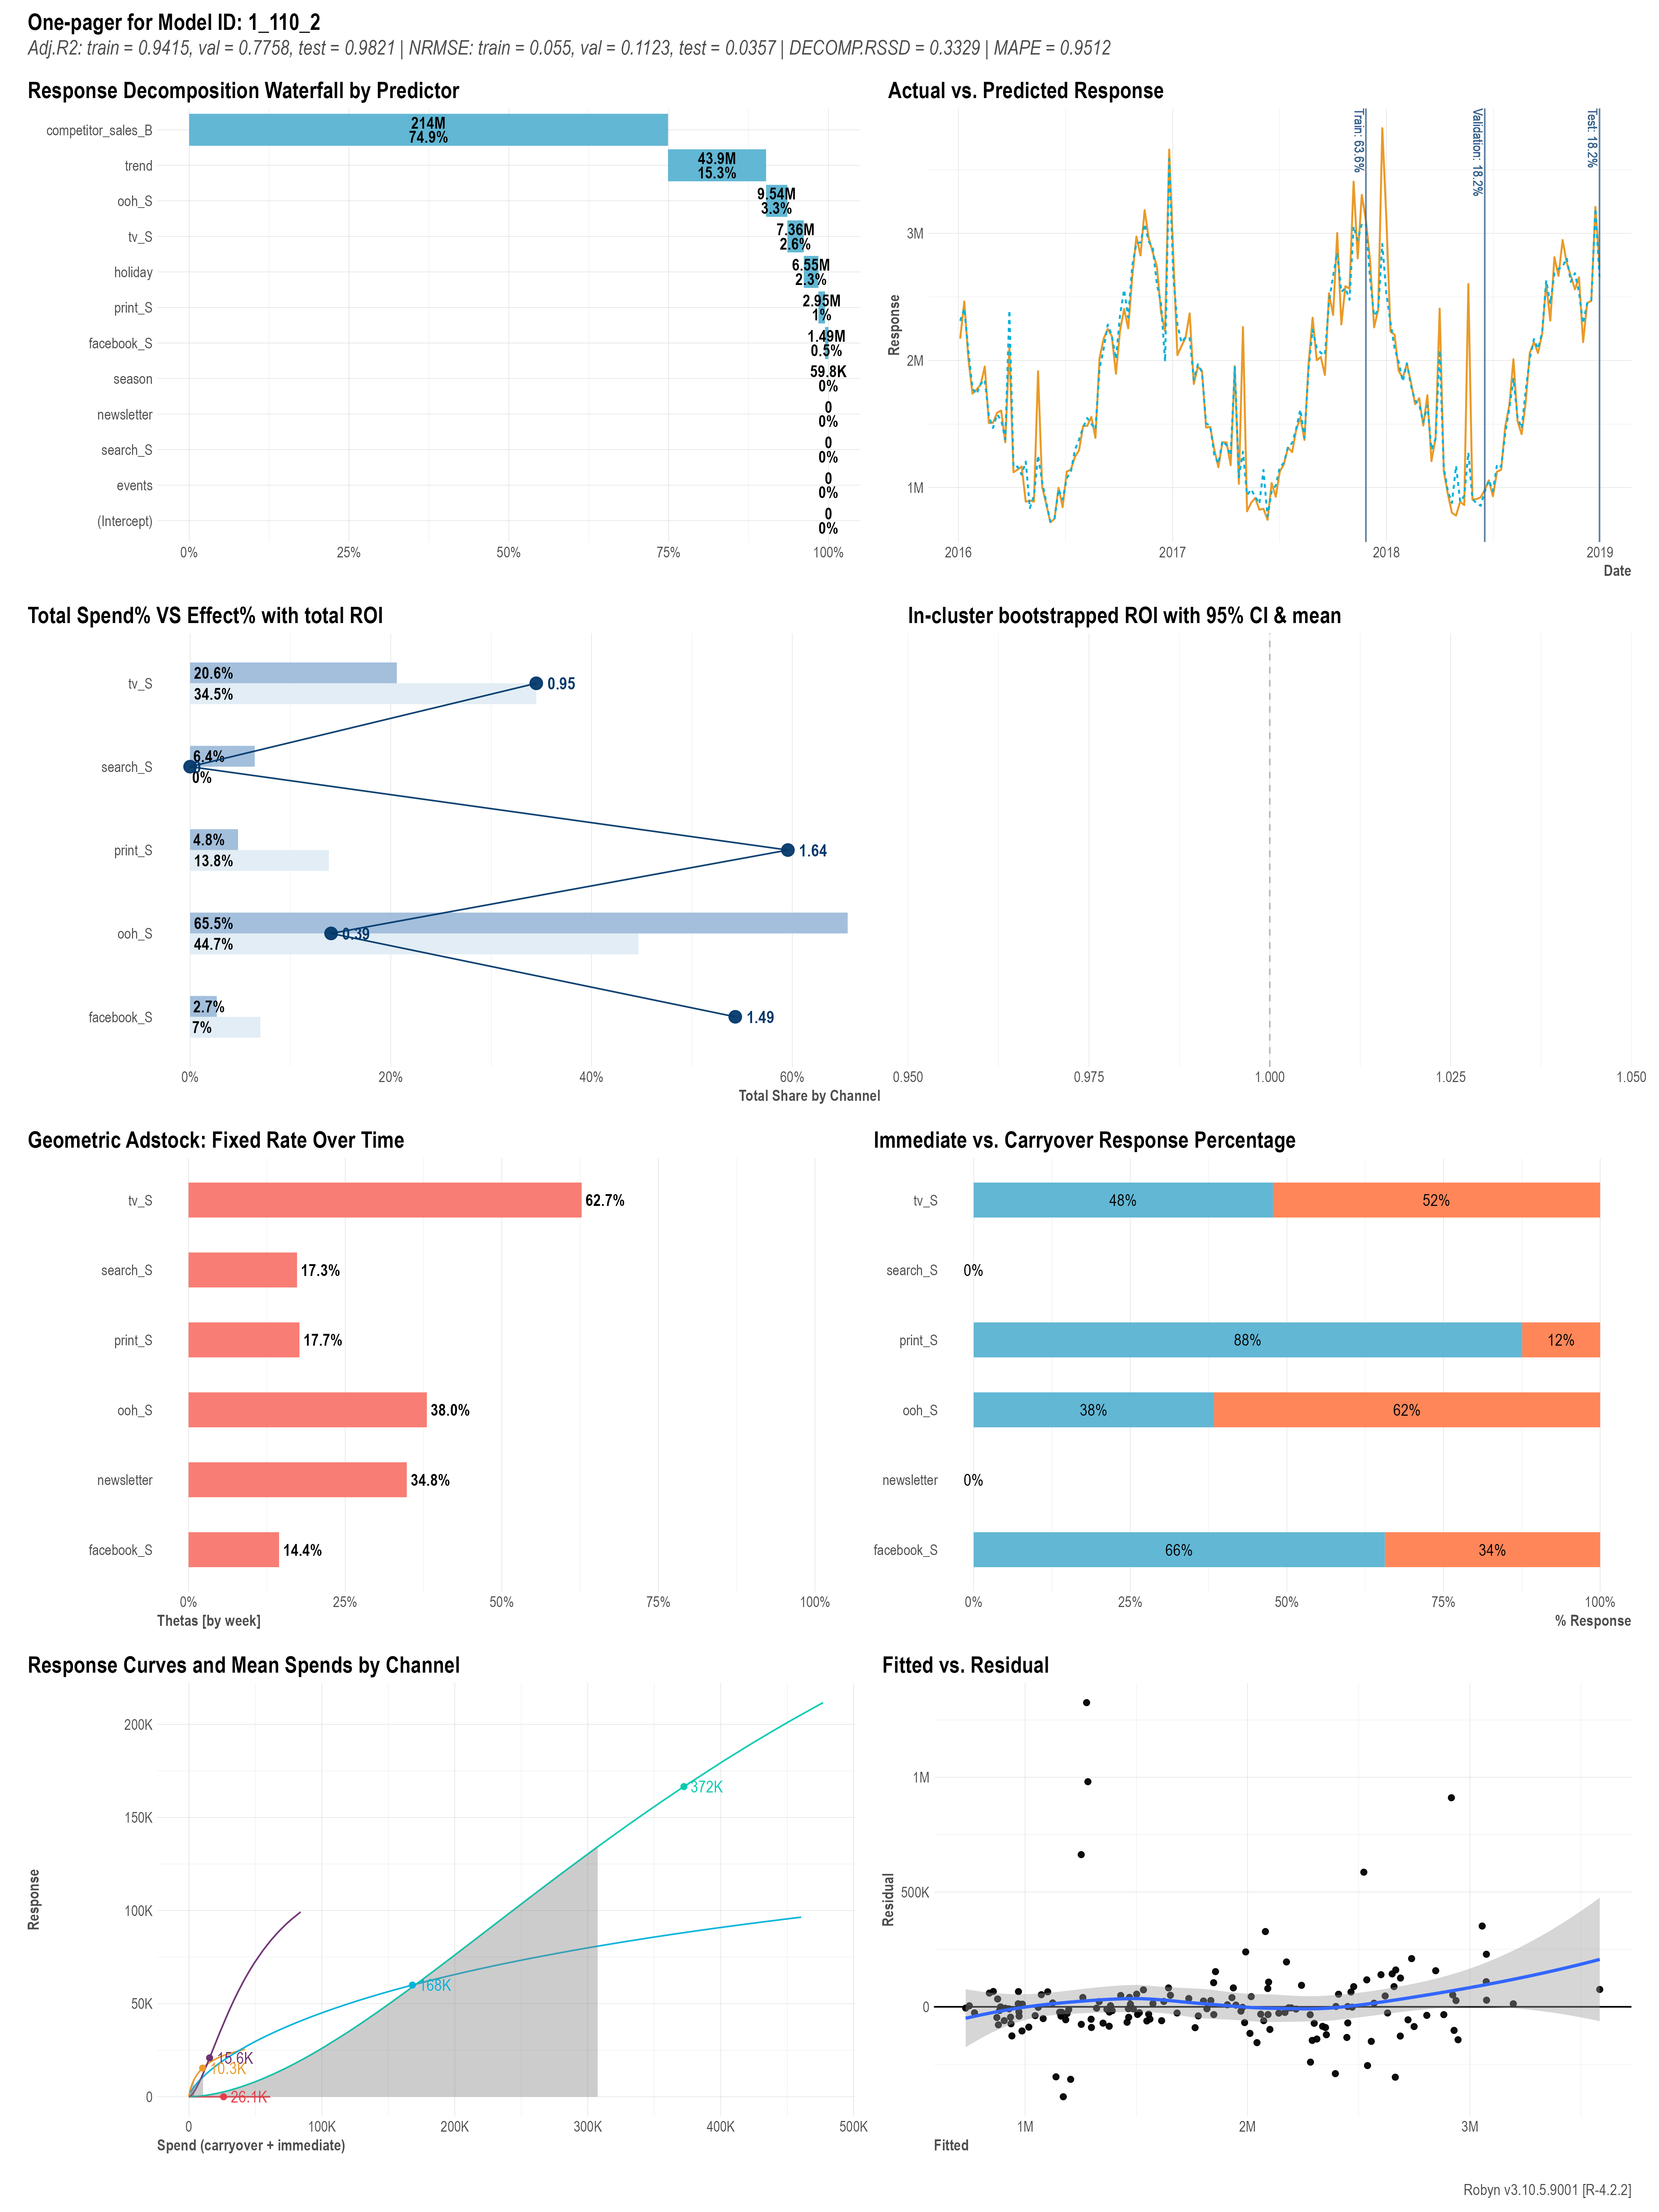

In [80]:
Image.open(io.BytesIO(binascii.unhexlify("".join(onepager))))

# Robyn Allocator

In [125]:
allocatorArgs = {
    "select_model" : select_model,
#     "date_range" : None, # Default last month as initial period
#     "total_budget" : None, # When NULL, default is total spend in date_range
    "channel_constr_low" : 0.7,
    "channel_constr_up" : 1.2,
    "channel_constr_multiplier" : 3,
    "scenario" : "max_response",
    "export" : False,
}

In [126]:
# Build the payload for the robyn_allocator()
payload = {
    'InputCollect' : json.dumps(InputCollect),
    'OutputCollect' : json.dumps(OutputCollect),
    "jsonAllocatorArgs": json.dumps(allocatorArgs),
    'dpi' : 300,
    'width' : 15,
    'height' : 15
}

In [130]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_allocator'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
allocator = respJson

>>> Running budget allocator for model ID 1_110_2 ...
Automatically picked date_range = 'last_4'
Date Window: 2018-12-10:2018-12-31 (4 weeks)
Excluded variables (coefficients are 0): search_S


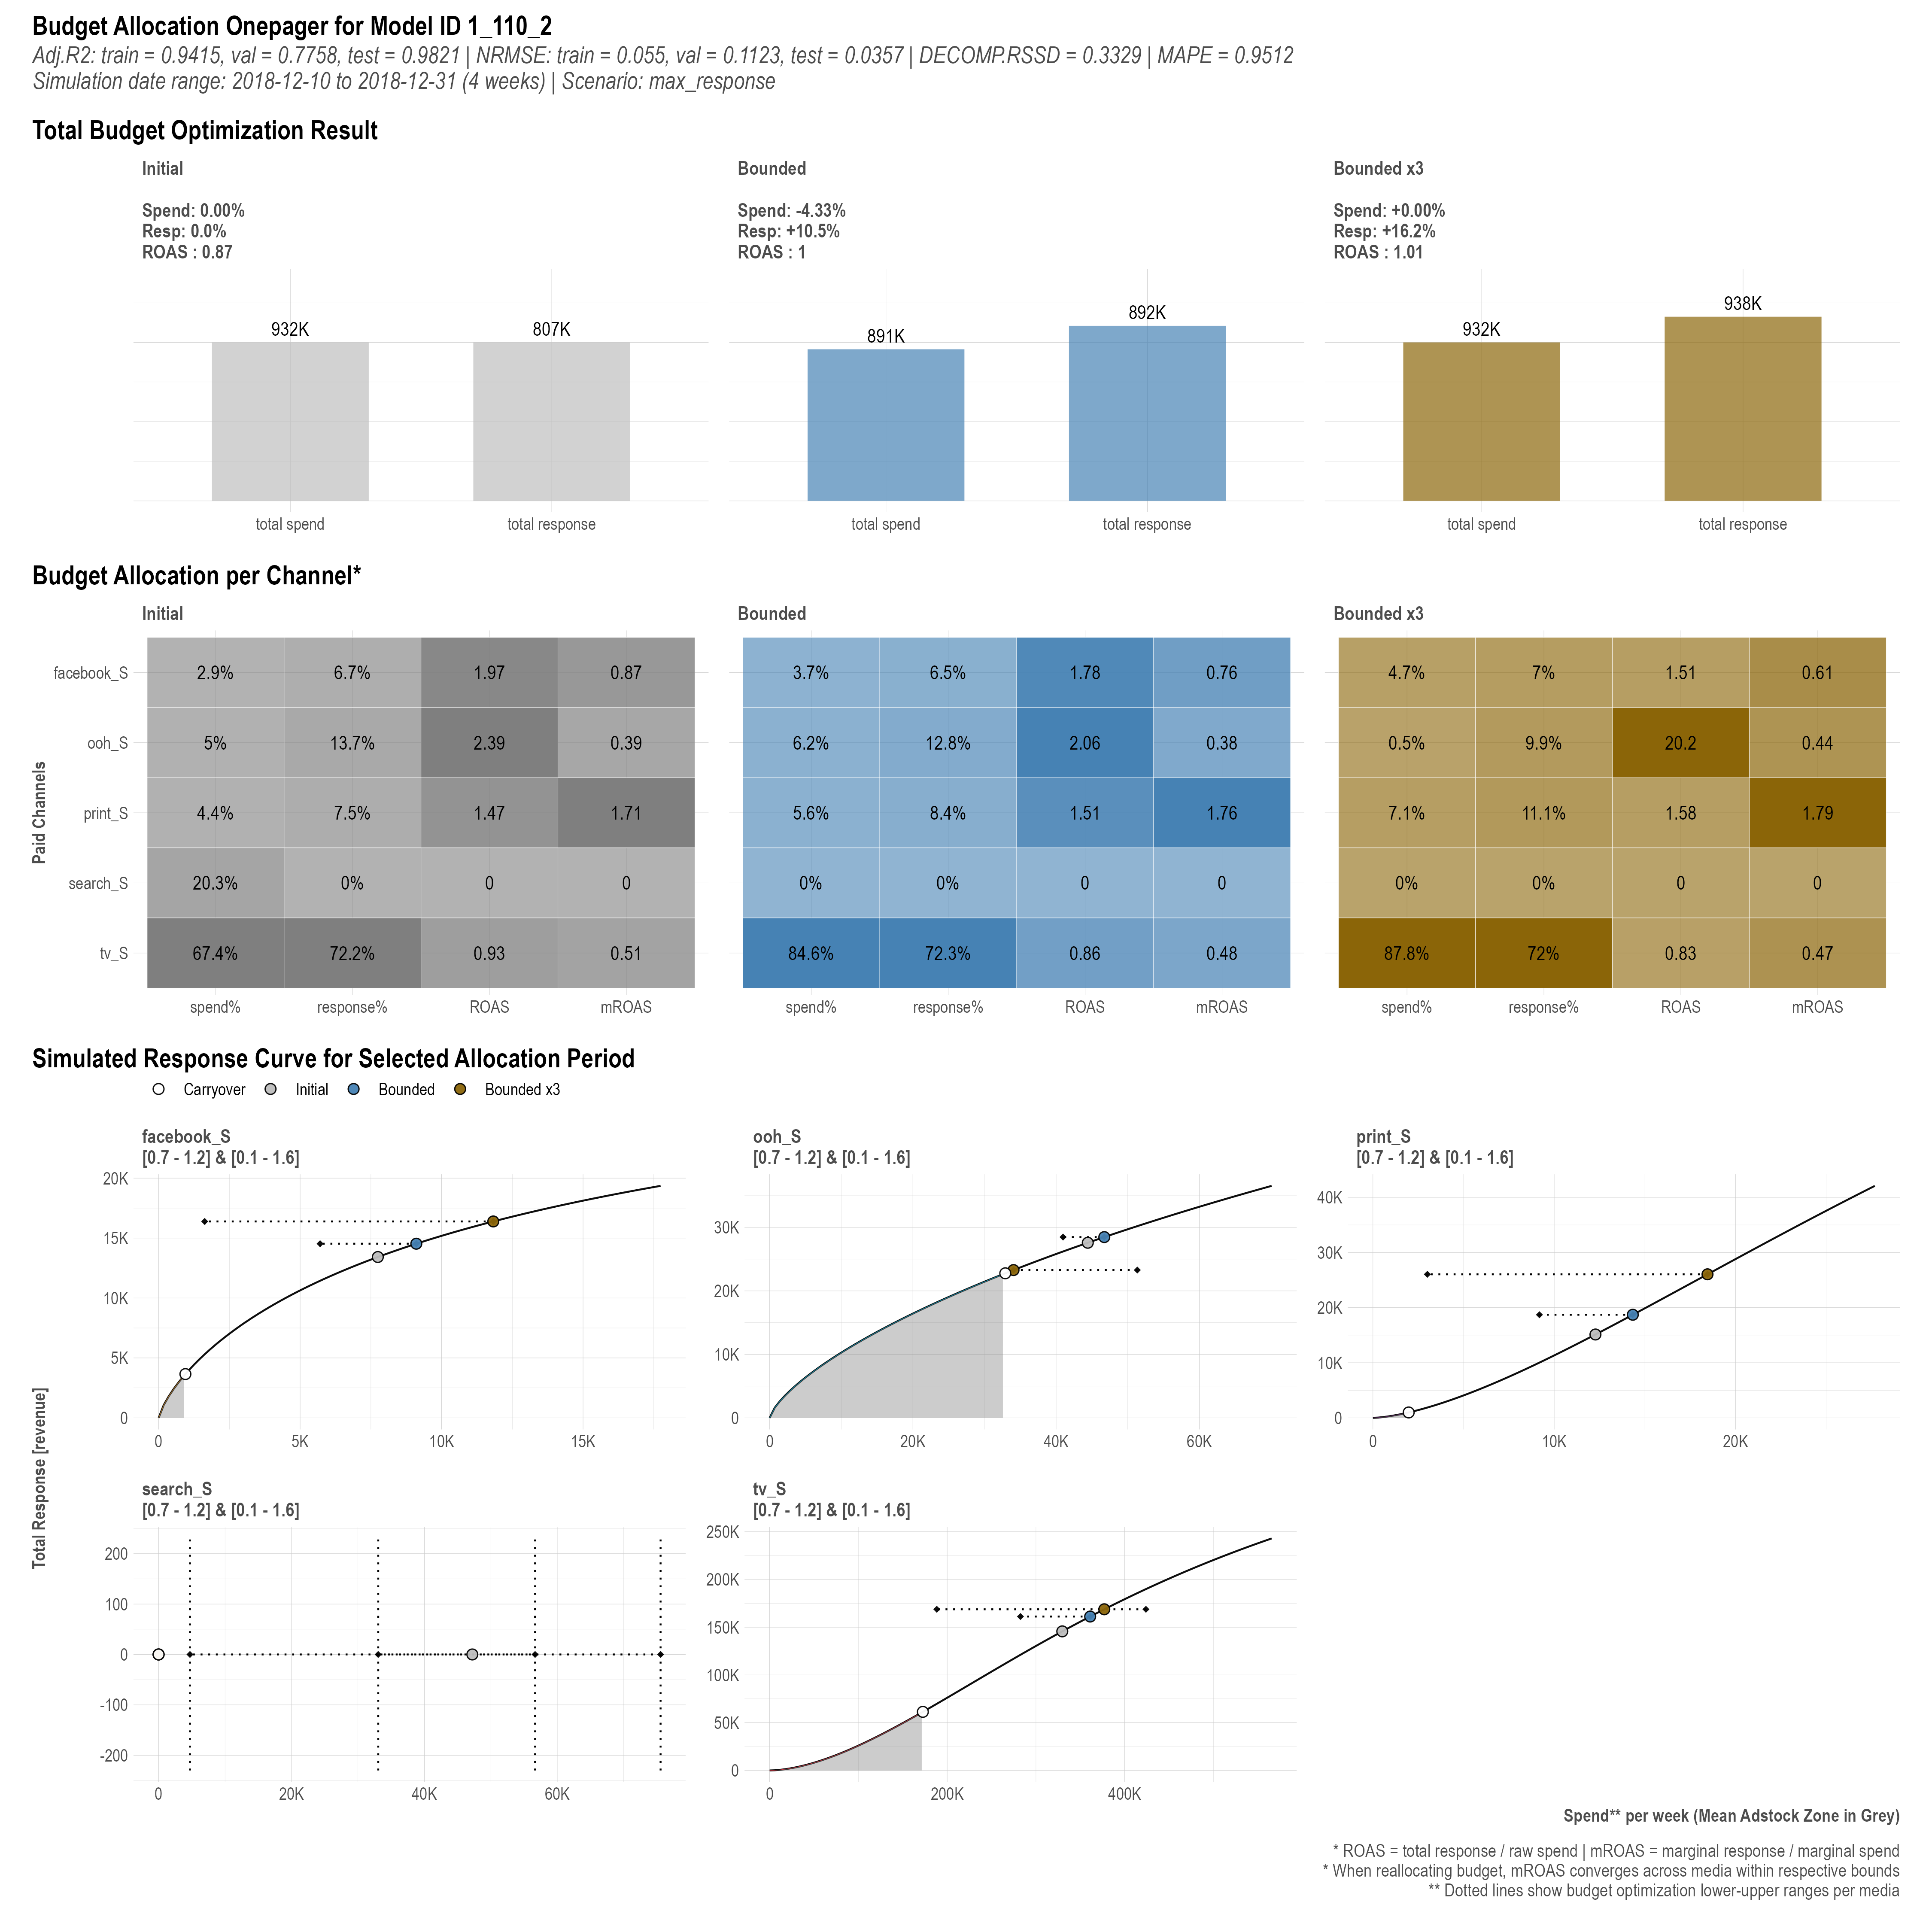

In [128]:
Image.open(io.BytesIO(binascii.unhexlify("".join(allocator))))

In [129]:
p.kill()
p = subprocess.Popen(["Rscript", "./api_call.R"])

Running plumber API at http://127.0.0.1:9999
Running swagger Docs at http://127.0.0.1:9999/__docs__/
